## Imports

In [22]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from keras.datasets import mnist # MNIST dataset is included in Keras

## Loading the dataset

In [144]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [145]:
print(f"Training matrix shape: {train_X.shape}")
print(f"Testing matrix shape: {test_X.shape}")

Training matrix shape: (60000, 28, 28)
Testing matrix shape: (10000, 28, 28)


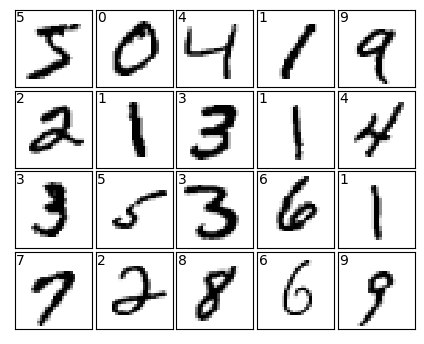

In [146]:
fig = plt.figure(figsize=(4, 4))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(20):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(train_X[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 4, str(train_y[i]))

In [147]:
new_shape = train_X[0].shape[0] * train_X[0].shape[1]

In [148]:
# Reshaping the dataset
train_X = train_X.reshape(train_X.shape[0], new_shape) 
test_X = test_X.reshape(test_X.shape[0], new_shape)  

# Change integers to 32-bit floating point numbers
train_X = train_X.astype('float32')   
test_X = test_X.astype('float32')

In [149]:
print(f"Training matrix shape: {train_X.shape}")
print(f"Testing matrix shape: {test_X.shape}")

Training matrix shape: (60000, 784)
Testing matrix shape: (10000, 784)


## Applying PCA

In [111]:
# Apply standarization to both train and test data
train_X = StandardScaler().fit_transform(train_X)
test_X = StandardScaler().fit_transform(test_X)

In [182]:
pca = PCA(n_components=.80)
pca.fit(train_X)

PCA(n_components=0.8)

In [183]:
print(f"Total number of components used after PCA : {pca.n_components_}")

Total number of components used after PCA : 44


In [184]:
train_img = pca.transform(train_X)
test_img = pca.transform(test_X)

In [185]:
print(f'train_img shape : {train_img.shape}')
print(f'test_img shape : {test_img.shape}')

train_img shape : (60000, 44)
test_img shape : (10000, 44)


In [186]:
train_approximation = pca.inverse_transform(train_img)
test_approximation = pca.inverse_transform(test_img)

In [187]:
print(f'train_approximation shape : {train_approximation.shape}')
print(f'test_approximation shape : {test_approximation.shape}')

train_approximation shape : (60000, 784)
test_approximation shape : (10000, 784)


## Data visualization after PCA

In [188]:
train_approximation = train_approximation.reshape(train_approximation.shape[0], 28, 28) 
test_approximation = test_approximation.reshape(test_approximation.shape[0], 28, 28)  

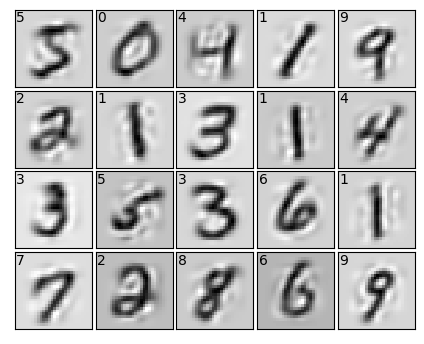

In [189]:
fig = plt.figure(figsize=(4, 4))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(20):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(train_approximation[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 4, str(train_y[i]))

## Explained variance

In [196]:
pca_var = PCA()
pca_var.fit(train_X)

PCA()

In [199]:
tot = sum(pca_var.explained_variance_)
var_exp = [(i/tot)*100 for i in sorted(pca_var.explained_variance_, reverse=True)] 
print(var_exp[0:5])

[9.704671368891109, 7.095913318413871, 6.169090057084866, 5.389417421623604, 4.868798321362281]


In [200]:
# Cumulative explained variance
cum_var_exp = np.cumsum(var_exp) 

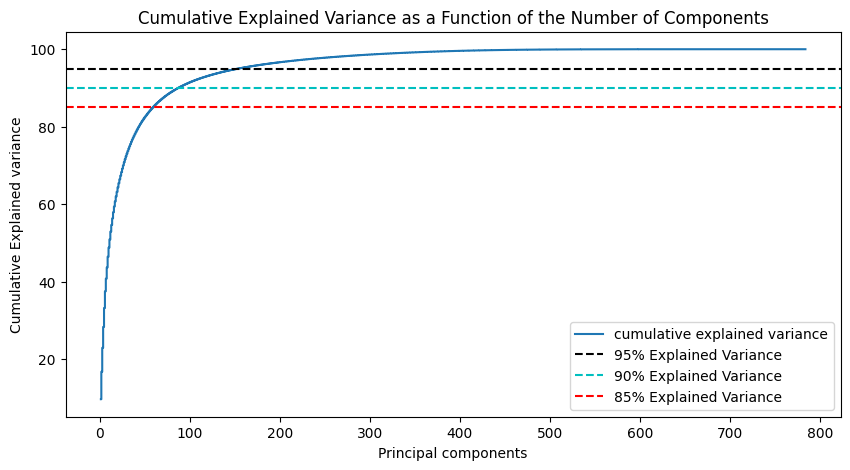

In [201]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.step(range(1, 785), cum_var_exp, where='mid',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()